In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

'Daily Time Spent on Site': consumer time on site in minutes
'Age': cutomer age in years
'Area Income': Avg. Income of geographical area of consumer
'Daily Internet Usage': Avg. minutes a day consumer is on the internet
'Ad Topic Line': Headline of the advertisement
'City': City of consumer
'Male': Whether or not consumer was male
'Country': Country of consumer
'Timestamp': Time at which consumer clicked on Ad or closed window
'Clicked on Ad': 0 or 1 indicated clicking on Ad# 

# Import Libraries
Import a few libraries you think you'll need (Or just import them as you go along!)

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# Get the Data
Read in the advertising.csv file and set it to a data frame called ad_data.

In [23]:
df = pd.read_csv("advertising (1).csv")

# **Check the head of ad_data**

In [24]:
df.head()

,Age,AreaIncome,DailyInternetUsage,Gender,ClickedonAd
0,35,61833.90,256.09,0,0
1,31,68441.85,193.77,1,0
2,26,59785.94,236.50,0,0
3,29,54806.18,245.89,1,0
4,35,73889.99,225.58,0,0


#  Use info and describe() on ad_data

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1000 non-null   int64  
 1   AreaIncome          1000 non-null   float64
 2   DailyInternetUsage  1000 non-null   float64
 3   Gender              1000 non-null   int64  
 4   ClickedonAd         1000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 39.2 KB


In [26]:
df.describe()

,Age,AreaIncome,DailyInternetUsage,Gender,ClickedonAd
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,36.009000,55000.000080,180.000100,0.481000,0.50000
std,8.785562,13414.634022,43.902339,0.499889,0.50025
min,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,42.000000,65470.635000,218.792500,1.000000,1.00000
max,61.000000,79484.800000,269.960000,1.000000,1.00000


# Exploratory Data Analysis
Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

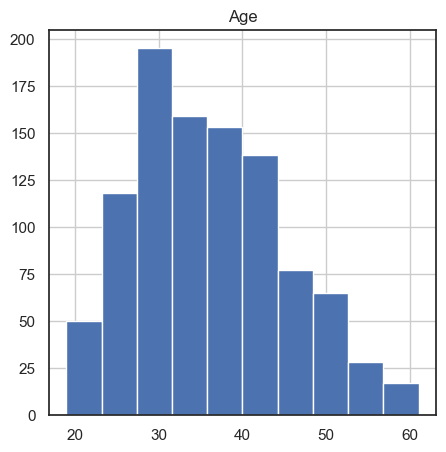

In [27]:
df.hist(column = ('Age'), figsize = (5,5))

# **Create a jointplot showing Area Income versus Age.**

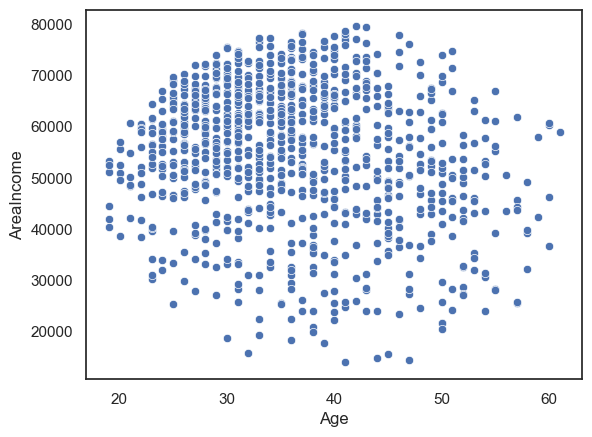

In [32]:
sn.scatterplot(x= 'Age', y= 'AreaIncome',data=df)
plt.show()

# **Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

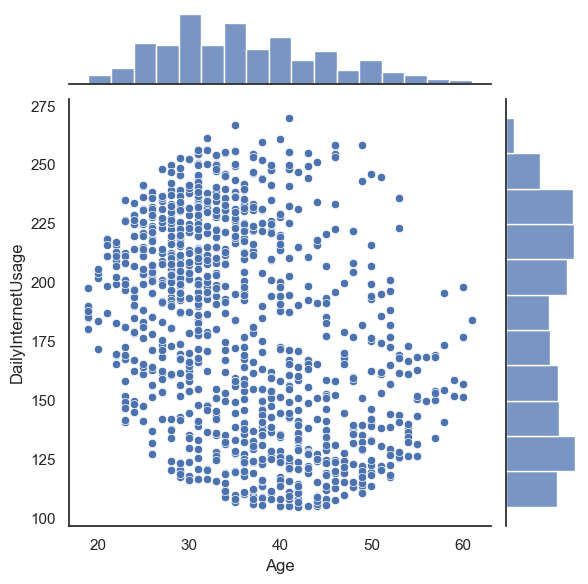

In [35]:
sn.jointplot(x='Age',y='DailyInternetUsage',data=df)

# ** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.

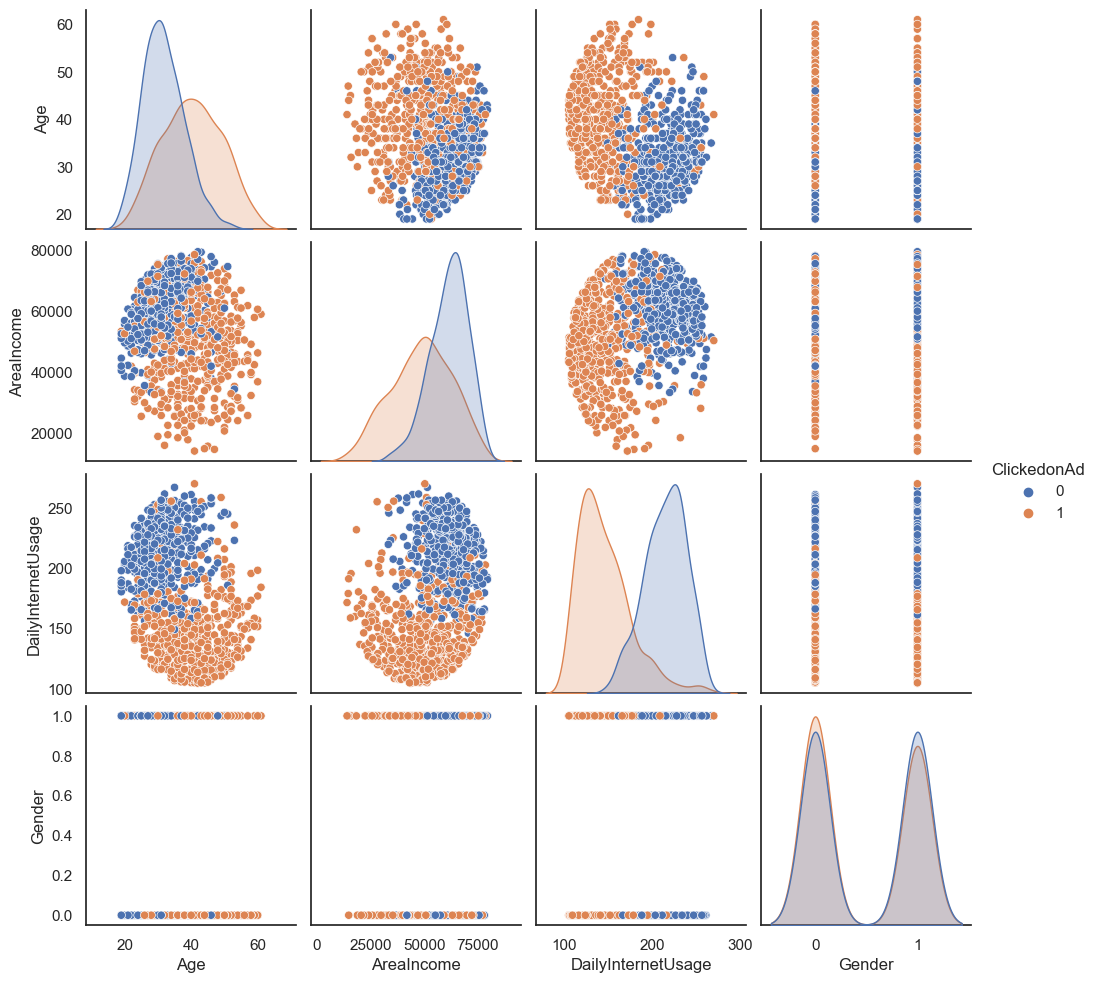

In [37]:
sn.pairplot(df, hue = 'ClickedonAd')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

In [40]:
x=df.drop('ClickedonAd',axis=1)

In [41]:
x

,Age,AreaIncome,DailyInternetUsage,Gender
0,35,61833.90,256.09,0
1,31,68441.85,193.77,1
2,26,59785.94,236.50,0
3,29,54806.18,245.89,1
4,35,73889.99,225.58,0
...,...,...,...,...
995,30,71384.57,208.58,1
996,45,67782.17,134.42,1
997,51,42415.72,120.37,1
998,19,41920.79,187.95,0


In [43]:
y=df['ClickedonAd']

In [44]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: ClickedonAd, Length: 1000, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3)

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 383 to 223
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 700 non-null    int64  
 1   AreaIncome          700 non-null    float64
 2   DailyInternetUsage  700 non-null    float64
 3   Gender              700 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 27.3 KB


In [48]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 705 to 986
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 300 non-null    int64  
 1   AreaIncome          300 non-null    float64
 2   DailyInternetUsage  300 non-null    float64
 3   Gender              300 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 11.7 KB


In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logmodel = LogisticRegression()

In [51]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [52]:
predictions = logmodel.predict(X_test)

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       154
           1       0.92      0.83      0.87       146

    accuracy                           0.88       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300



In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
print(confusion_matrix(y_test,predictions))

[[144  10]
 [ 25 121]]
